In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
import imghdr
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from keras.models import Sequential

In [102]:
data_dir='./Animal Dataset'

In [103]:
image_exts=['jpeg','jpg','bmp','png']

In [104]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issu with Image {}'.format(image_path))
            os.remove(image_path)

In [105]:
dataset=tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=32,shuffle=True,validation_split=False,
                                                   image_size=(256,256))

Found 828 files belonging to 3 classes.


In [106]:
class_names=dataset.class_names
class_names

['Elephant', 'Lion', 'Zebra']

In [107]:
len(dataset)

26

In [108]:
for image,label in dataset.take(1):
    print(image.numpy())
    print(label.numpy())

[[[[226.        230.        233.       ]
   [226.        230.        233.       ]
   [226.        230.        233.       ]
   ...
   [205.        213.        216.       ]
   [204.25781   212.25781   215.25781  ]
   [204.        212.        215.       ]]

  [[226.        230.        233.       ]
   [226.        230.        233.       ]
   [226.        230.        233.       ]
   ...
   [204.72375   212.72375   215.72375  ]
   [204.13293   212.13293   215.13293  ]
   [204.        212.        215.       ]]

  [[225.85938   229.85938   232.85938  ]
   [225.85938   229.85938   232.85938  ]
   [225.85938   229.85938   232.85938  ]
   ...
   [204.36926   212.36926   215.36926  ]
   [204.        212.        215.       ]
   [203.87146   211.87146   214.87146  ]]

  ...

  [[130.71875   121.71875   116.71875  ]
   [130.71875   121.71875   116.71875  ]
   [130.71875   121.71875   116.71875  ]
   ...
   [ 95.859375   99.859375   98.859375 ]
   [ 95.859375   99.859375   98.859375 ]
   [ 95.07385   

In [109]:
batch=dataset.as_numpy_iterator().next()
batch

(array([[[[145.62738   , 158.47113   , 113.70245   ],
          [117.142456  , 138.5487    ,  72.267456  ],
          [ 85.01526   ,  83.88599   ,  89.25568   ],
          ...,
          [147.74005   , 152.6076    , 129.12695   ],
          [160.30676   , 166.20197   , 155.7638    ],
          [172.29108   , 176.81213   , 154.18628   ]],
 
         [[150.37683   , 160.06433   , 123.06433   ],
          [127.839905  , 146.2384    ,  88.1272    ],
          [102.49841   , 101.06091   , 106.49841   ],
          ...,
          [193.685     , 197.2475    , 174.46625   ],
          [151.47131   , 157.93231   , 137.901     ],
          [170.27936   , 178.77869   , 153.56451   ]],
 
         [[111.25348   , 121.42767   ,  84.002075  ],
          [117.144165  , 125.550964  ,  98.95862   ],
          [104.30487   ,  99.29889   , 106.08313   ],
          ...,
          [191.45953   , 200.48517   , 173.0357    ],
          [165.78821   , 170.25055   , 151.86353   ],
          [133.38599   , 137.04

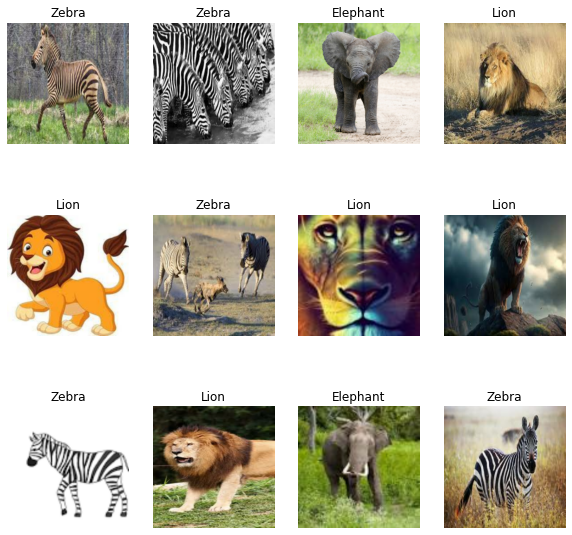

In [110]:
plt.figure(figsize=(10,10))
for image,label in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [111]:
dataset=dataset.map(lambda x,y:(x/255,y))

In [112]:
dataset.as_numpy_iterator().next()

(array([[[[0.37013635, 0.4096967 , 0.27071846],
          [0.3802543 , 0.42545956, 0.26239276],
          [0.47326133, 0.53285843, 0.33178616],
          ...,
          [0.23969056, 0.31764707, 0.        ],
          [0.28933823, 0.36384803, 0.01443781],
          [0.38457415, 0.46266085, 0.09114584]],
 
         [[0.35368004, 0.3899821 , 0.23974468],
          [0.40309885, 0.44968587, 0.27486512],
          [0.52079767, 0.57874554, 0.36701146],
          ...,
          [0.30636245, 0.38724732, 0.04506242],
          [0.36173865, 0.44000152, 0.08702514],
          [0.41806215, 0.49819034, 0.13026346]],
 
         [[0.35314283, 0.38631698, 0.21662492],
          [0.45258406, 0.50016373, 0.305755  ],
          [0.57233804, 0.6282008 , 0.39965364],
          ...,
          [0.38992208, 0.4750247 , 0.10786359],
          [0.45244333, 0.53582263, 0.18049939],
          [0.464488  , 0.5478673 , 0.18539028]],
 
         ...,
 
         [[0.37484172, 0.3042535 , 0.22513276],
          [0.43117

In [113]:
def data_splitting(data):
    train_ds=data.take(int(len(data)*0.8))
    val_ds=data.skip(int(len(data)*0.8)).take(int(len(data)*0.1))
    test_ds=data.skip(int(len(data)*0.8)+int(len(data)*0.1)).take(int(len(data)*0.1))
    return train_ds,val_ds,test_ds

In [114]:
train,val,test=data_splitting(dataset)

In [115]:
len(train)

20

In [116]:
len(val)

2

In [117]:
len(test)

2

In [166]:
train=train.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val=val.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
test=test.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [167]:
data_augmentation=Sequential([
    layers.RandomFlip(mode='horizontal_and_vertical'),
])

In [168]:
model=Sequential()

In [169]:
model.add(data_augmentation)
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,256,256,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Flatten()),
model.add(Dense(32,activation='relu')),
model.add(Dense(3,activation='softmax'))

In [170]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy']
)

In [171]:
hist=model.fit(train,epochs=20,validation_data=val)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.3763 - loss: 1.4382 - val_accuracy: 0.6250 - val_loss: 0.7354
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6689 - loss: 0.7777 - val_accuracy: 0.7344 - val_loss: 0.6683
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7828 - loss: 0.5677 - val_accuracy: 0.7969 - val_loss: 0.4600
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.8088 - loss: 0.5010 - val_accuracy: 0.7656 - val_loss: 0.4542
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.7739 - loss: 0.5408 - val_accuracy: 0.7500 - val_loss: 0.6680
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7680 - loss: 0.6015 - val_accuracy: 0.7969 - val_loss: 0.4135
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8563 - loss: 0.3905 - val_accuracy: 0.8594 - val_loss: 0.2982
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.8904 - loss: 0.3230 - val_accuracy: 0.8750 - val_loss:

In [172]:
model.evaluate(test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 360ms/step - accuracy: 0.9688 - loss: 0.1081


[0.1145775243639946, 0.96875]

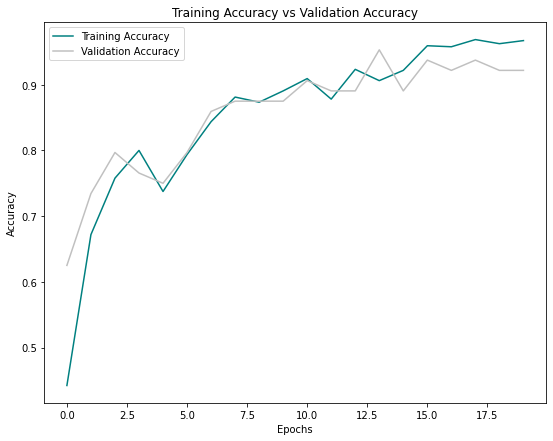

In [177]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['accuracy'],color='teal',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='silver',label='Validation Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

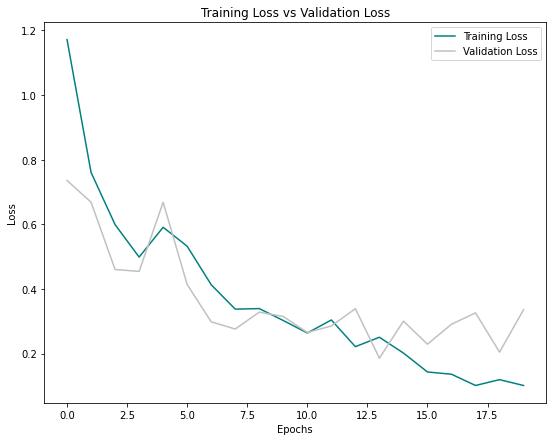

In [179]:
plt.figure(figsize=(9,7))
plt.plot(hist.history['loss'],color='teal',label='Training Loss')
plt.plot(hist.history['val_loss'],color='silver',label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()